In [30]:
import pandas as pd
import locale

# Imposta la locale in italiano, che usa il punto come separatore delle migliaia
locale.setlocale(locale.LC_ALL, 'it_IT')

# Carica il file Excel
df = pd.read_excel('/Users/andreacip/Downloads/dpc-covid19-ita-andamento-nazionale.xlsx')

# Assicurati che la colonna della data sia nel formato datetime e rimuovi l'orario
df['data'] = pd.to_datetime(df['data']).dt.normalize()

# Imposta la colonna della data come indice del DataFrame
df.set_index('data', inplace=True)

# Escludi la colonna con intestazione "test"
if 'test' in df.columns:
    df.drop(columns=['test'], inplace=True)

# Raggruppa i dati per semestre e calcola la somma
df_semestrale = df.resample('6M').sum()

# Converti l'indice in formato 'YYYY-MM-dd' senza cambiare il tipo di indice
df_semestrale.index = df_semestrale.index.strftime('%d-%m-%Y')

# Funzione per formattare i numeri con il punto come separatore delle migliaia
def format_with_dots(number):
    return locale.format_string("%d", number, grouping=True)

# Applica la formattazione a tutte le colonne numeriche del DataFrame
df_semestrale = df_semestrale.apply(lambda x: x.apply(format_with_dots) if x.dtype == 'float64' else x)

# Visualizza le prime righe del DataFrame semestrale con stile
print("DataFrame semestrale:")
display(df_semestrale.head().style.background_gradient(cmap='coolwarm'))

# Calcola la media dei 'nuovi_positivi' per semestre e rimuovi l'orario se presente
media_nuovi_positivi_semestrale = df['nuovi_positivi'].resample('6M').mean()
media_nuovi_positivi_semestrale.index = media_nuovi_positivi_semestrale.index.strftime('%d-%m-%Y')

# Visualizza la media semestrale dei nuovi positivi con stile
print("\nMedia semestrale dei nuovi positivi:")
display(media_nuovi_positivi_semestrale.to_frame(name='Media Nuovi Positivi').style.background_gradient(cmap='coolwarm'))

# Calcola altre statistiche per ogni semestre
statistiche_semestrali = df['nuovi_positivi'].resample('6M').agg(['mean', 'median', 'min', 'max', 'std'])
statistiche_semestrali.index = statistiche_semestrali.index.strftime('%d-%m-%Y')

# Visualizza le statistiche semestrali dei nuovi positivi con stile
print("\nStatistiche semestrali dei nuovi positivi:")
display(statistiche_semestrali.style.background_gradient(cmap='coolwarm'))


DataFrame semestrale:


,ricoverati_con_sintomi,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,
29-02-2020,1337,1716,3375,1120,146,96,3617,68904
31-08-2020,1672455,6054210,7914661,268183,22790833,4943236,35648730,699294349
28-02-2021,3266801,70249737,73873427,2659438,180328835,10792882,264995162,3968245667
31-08-2021,2152931,48342502,50780649,1605859,669606087,22275265,742662024,11860237514
28-02-2022,1527150,135038227,136717365,8104318,1044162511,24788972,1205669081,22922585585



Media semestrale dei nuovi positivi:


,Media Nuovi Positivi
data,
29-02-2020,186.666667
31-08-2020,1457.516304
28-02-2021,14693.027624
31-08-2021,8727.494565
28-02-2022,44775.237569
31-08-2022,48527.005435
28-02-2023,20582.469613
31-08-2023,1970.956522
29-02-2024,4185.164835



Statistiche semestrali dei nuovi positivi:


,mean,median,min,max,std
data,,,,,
29-02-2020,186.666667,229.500000,78,250,79.058628
31-08-2020,1457.516304,635.500000,114,6557,1652.154225
28-02-2021,14693.027624,13720.000000,978,40902,10002.539305
31-08-2021,8727.494565,6342.000000,389,26824,7412.332099
28-02-2022,44775.237569,12877.000000,1516,220532,59689.730644
31-08-2022,48527.005435,41874.500000,7537,142967,27986.390890
28-02-2023,20582.469613,18797.000000,1497,65925,14426.136287
31-08-2023,1970.956522,1458.500000,195,6706,1445.047895
29-02-2024,4185.164835,3976.500000,80,16615,3452.090425


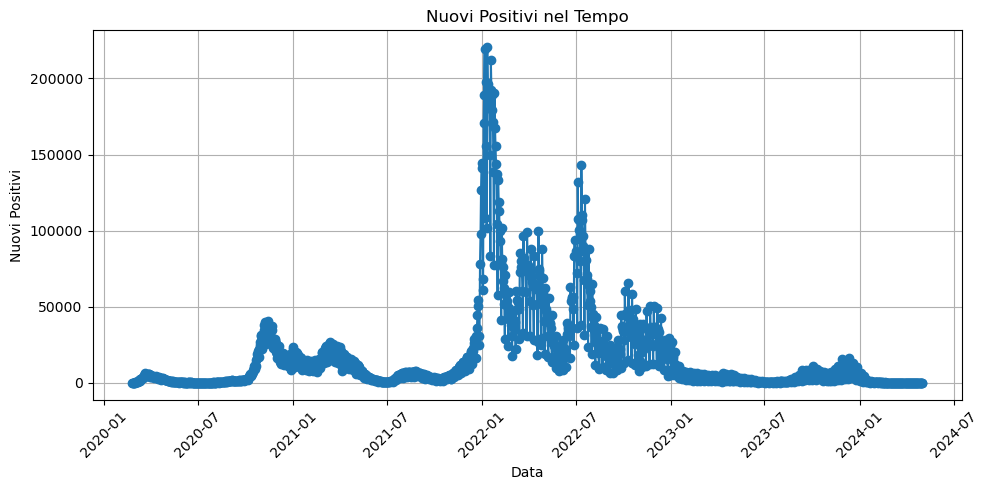

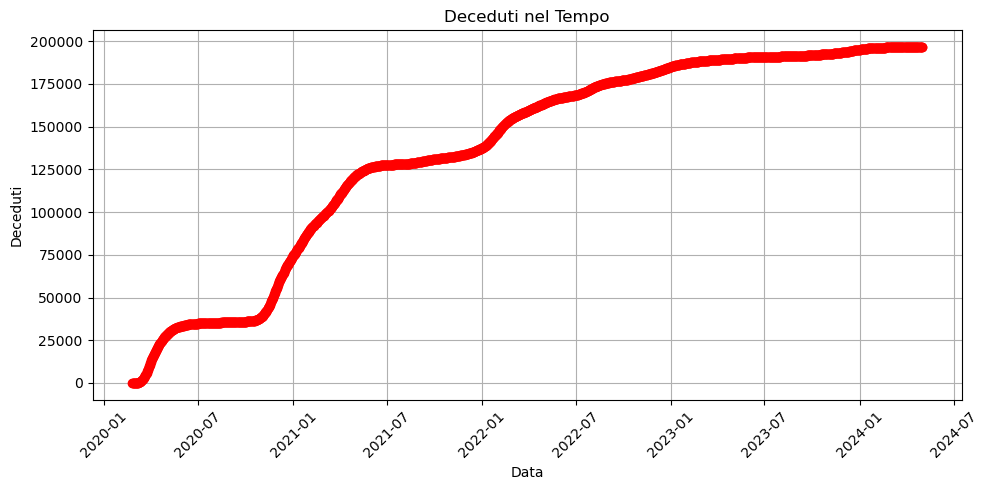

Media dei nuovi positivi: 17,281.54
Mediana dei totale casi: 14,496,579
Totale tamponi effettuati: 244,462,343,544


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei dati dal file xlsx
file_path = '/Users/andreacip/Downloads/dpc-covid19-ita-andamento-nazionale.xlsx'  # Sostituisci con il percorso del tuo file
df = pd.read_excel(file_path)

# Grafico dei nuovi positivi nel tempo
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['data']), df['nuovi_positivi'], marker='o')
plt.title('Nuovi Positivi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Nuovi Positivi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico dei deceduti nel tempo
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['data']), df['deceduti'], marker='o', color='red')
plt.title('Deceduti nel Tempo')
plt.xlabel('Data')
plt.ylabel('Deceduti')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Riassunto delle statistiche
print(f"Media dei nuovi positivi: {df['nuovi_positivi'].mean():,.2f}")
print(f"Mediana dei totale casi: {df['totale_casi'].median():,.0f}")
print(f"Totale tamponi effettuati: {df['tamponi'].sum():,.0f}")
